# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [47]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
from newsapi import NewsApiClient
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/christilbey/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [50]:
load_dotenv()

True

In [51]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")
type(api_key)

str

In [52]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [53]:
#create article df function
def create_df(news, language):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "language": language
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

In [85]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(
    q= " bitcoin",
    language="en",
    sort_by="relevancy"
)

In [86]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(
    q=" ethereum AND ETH AND 2022",
    language="en",
    sort_by="relevancy"
)
eth_news['totalResults']

812

In [56]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_news["articles"]:
    
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
btc_df = pd.DataFrame(btc_sentiments)

In [57]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_news["articles"]:
    
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
eth_df = pd.DataFrame(eth_sentiments)

In [58]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.00000,20.000000,20.00000
mean,0.034915,0.07095,0.059300,0.86975
std,0.363116,0.06273,0.060653,0.09075
min,-0.440400,0.00000,0.000000,0.55700
25%,-0.286625,0.02700,0.000000,0.84250
50%,0.064400,0.07400,0.063000,0.88500
75%,0.254725,0.08500,0.077000,0.92425
max,0.750600,0.20200,0.241000,0.96400


In [59]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.00000,20.000000,20.000000
mean,0.138465,0.06225,0.032050,0.905750
std,0.404157,0.06959,0.042355,0.071066
min,-0.757400,0.00000,0.000000,0.737000
25%,-0.089950,0.00000,0.000000,0.867250
50%,0.165150,0.04950,0.018000,0.921000
75%,0.435300,0.09400,0.047500,0.956250
max,0.865500,0.26300,0.164000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [60]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [61]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also'}

In [62]:
# Complete the tokenizer function
def clean_text(article):
    
    # Create a list of the words
    sw = set(stopwords.words('english'))

    # Convert the words to lowercase
    regex = re.compile("[^a-zA-Z ]")

    # Remove the punctuation
    re_clean = regex.sub('', article)

    # Remove the stop words
    words = word_tokenize(re_clean)

    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    # .union combines all items from two sets (AND EXCLUDES DUPLICATES)
    output = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    
    # Return the final list
    return output

In [63]:
# Create a new tokens column for Bitcoin
btc_df['tokens'] = btc_df['text'].apply(word_tokenize)
btc_df.head()

,text,date,compound,positive,negative,neutral,tokens
0,"Now, even though there are a number of women-f...",2022-05-10,0.0772,0.036,0.000,0.964,"[Now, ,, even, though, there, are, a, number, ..."
1,A Bitcoin mining site powered by otherwise los...,2022-05-04,-0.0516,0.056,0.061,0.882,"[A, Bitcoin, mining, site, powered, by, otherw..."
2,Wikipedia editors have voted in favor of dropp...,2022-04-14,0.4019,0.088,0.000,0.912,"[Wikipedia, editors, have, voted, in, favor, o..."
3,Warren Buffett has always been a bitcoin skept...,2022-05-02,-0.3269,0.085,0.143,0.772,"[Warren, Buffett, has, always, been, a, bitcoi..."
4,"Image source, Getty Images\r\nThe value of Bit...",2022-05-09,0.3400,0.072,0.000,0.928,"[Image, source, ,, Getty, Images, The, value, ..."


In [64]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = eth_df['text'].apply(word_tokenize)
eth_df.head()

,text,date,compound,positive,negative,neutral,tokens
0,A multi-billion dollar cryptocurrency company ...,2022-05-02,-0.2263,0.046,0.075,0.879,"[A, multi-billion, dollar, cryptocurrency, com..."
1,When Bored Ape Yacht Club creators Yuga Labs a...,2022-05-04,-0.2732,0.000,0.055,0.945,"[When, Bored, Ape, Yacht, Club, creators, Yuga..."
2,If you ever wanted to buy an NFT based on Ethe...,2022-05-02,-0.1027,0.000,0.036,0.964,"[If, you, ever, wanted, to, buy, an, NFT, base..."
3,Digital transformation is disrupting global bu...,2022-04-18,0.4939,0.135,0.000,0.865,"[Digital, transformation, is, disrupting, glob..."
4,We are excited to bring Transform 2022 back in...,2022-04-13,0.8655,0.263,0.000,0.737,"[We, are, excited, to, bring, Transform, 2022,..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [65]:
from collections import Counter
from nltk import ngrams

In [66]:

# Generate the Bitcoin N-grams where N=2
def word_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus.text)
    processed = clean_text(big_string)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

word_counter(btc_df)

,bigram,count
0,"(reuters, bitcoin)",5
1,"(previous, closebitcoin)",4
2,"(closebitcoin, world)",4
3,"(world, biggest)",4
4,"(biggest, bestknown)",4
5,"(bestknown, cryptocurrency)",4
6,"(may, reuters)",4
7,"(char, may)",3
8,"(b, char)",2
9,"(wikipedia, editor)",2


In [67]:
# Generate the Ethereum N-grams where N=2
word_counter(eth_df)

,bigram,count
0,"(yuga, labs)",2
1,"(ha, char)",2
2,"(ethereum, eth)",2
3,"(nonfungible, token)",2
4,"(multibillion, dollar)",1
5,"(dollar, cryptocurrency)",1
6,"(cryptocurrency, company)",1
7,"(company, ha)",1
8,"(ha, apologised)",1
9,"(apologised, user)",1


In [68]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [69]:
# Use token_count to get the top 10 words for Bitcoin
btc_text = ' '.join(btc_df.text)
btc_processed = clean_text(btc_text)
token_count(btc_processed)

[('char', 19),
 ('bitcoin', 13),
 ('cryptocurrency', 11),
 ('world', 6),
 ('reuters', 6),
 ('ha', 5),
 ('april', 4),
 ('dropped', 4),
 ('previous', 4),
 ('closebitcoin', 4)]

In [70]:
# Use token_count to get the top 10 words for Ethereum
eth_text = ' '.join(eth_df.text)
eth_processed = clean_text(eth_text)

token_count(eth_processed)

[('char', 20),
 ('cryptocurrency', 9),
 ('ha', 8),
 ('ethereum', 5),
 ('nft', 4),
 ('last', 4),
 ('digital', 4),
 ('token', 4),
 ('labs', 3),
 ('launch', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [71]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

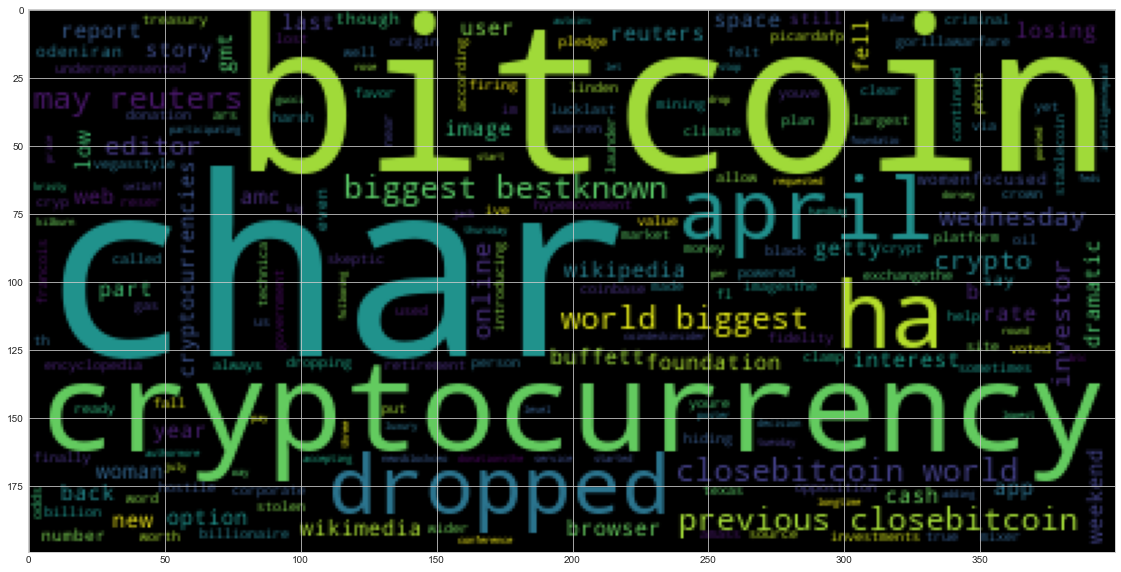

In [72]:
# Generate the Bitcoin word cloud
btc_words = ' '.join(btc_processed)

btc_cloud = WordCloud().generate(btc_words)
plt.imshow(btc_cloud)

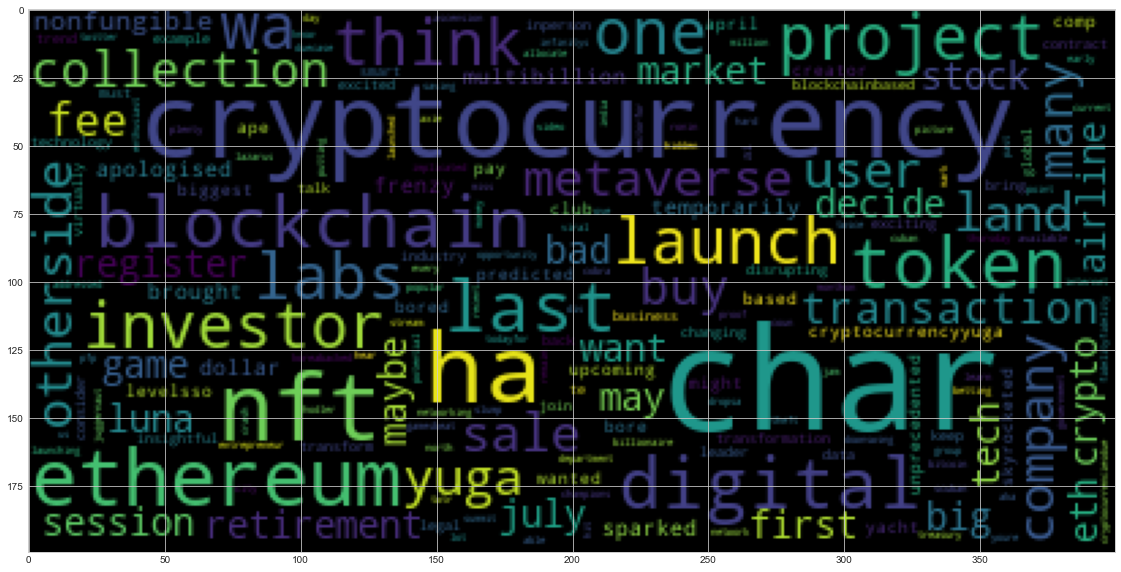

In [73]:
# Generate the Ethereum word cloud
eth_words = ' '.join(eth_processed)

eth_cloud = WordCloud().generate(eth_words)
plt.imshow(eth_cloud)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [74]:
import spacy
from spacy import displacy

In [75]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [76]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [77]:

# Concatenate all of the Bitcoin text together
btc_text = ' '.join(btc_df.text)

In [78]:
# Run the NER processor on all of the text
btc_ner = nlp(btc_text)

# Add a title to the document
btc_ner.user_data["title"] = "Bitcoin NER"

In [79]:
# Render the visualization
displacy.render(btc_ner, style='ent')

In [80]:
# List all Entities
entity = []
label = []

for ent in btc_ner.ents:
    entity.append(ent.text)
    label.append(ent.label_)
    
data = {"Entity": entity, "Label":label}

btc_entities = pd.DataFrame(data)
btc_entities

,Entity,Label
0,Odeniran,GPE
1,Linden,GPE
2,Texas,GPE
3,April 4th,DATE
4,2022,DATE
...,...,...
96,The Central African Republic,ORG
97,second,ORDINAL
98,El Salvador,GPE
99,Wednesday,DATE


---

### Ethereum NER

In [81]:

# Concatenate all of the Ethereum text together
eth_text = ' '.join(eth_df.text)

In [82]:
# Run the NER processor on all of the text
eth_ner = nlp(eth_text)

# Add a title to the document
eth_ner.user_data["title"] = "Ethereum NER"

In [83]:
# Render the visualization
displacy.render(eth_ner, style='ent')

In [84]:
Ethereum NER
A multi-billion dollar cryptocurrency company has apologised to users after its sale of metaverse land sparked a frenzy that temporarily brought down the Ethereum ORG cryptocurrency. Yuga Labs PERSON , the comp… [+3475 chars] When Bored Ape Yacht Club PERSON creators Yuga Labs PERSON announced its Otherside ORG NFT collection would launch on April 30 DATE , it was predicted by many to be the biggest NFT ORG launch ever. Otherside is an upcoming Bore… [+6669 chars] If you ever wanted to buy an NFT ORG based on Ethereum ORG , you would have to pay a transaction fee to register it on the blockchain. Last week DATE , that fee skyrocketed to unprecedented levels. So you might ha… [+7216 chars] Digital ORG transformation is disrupting global businesses. The legal industry must consider digital technologies to keep changing tech trends. Blockchain-based smart contracts are one CARDINAL example of such te… [+8816 chars] Mike Masnick PERSON wrote a good piece on this topic on his Techdirt blog last week DATE . I particularly like this part: First ORDINAL , lets look at the world without any content moderation. A website that has no cont… [+3109 chars] We are excited to bring Transform ORG 2022 back in-person July 19 DATE and virtually July 20 - 28 DATE . Join AI and data leaders for insightful talks and exciting networking opportunities. Register today DATE ! For ove… [+6087 chars] The U.S. Treasury Department ORG has implicated the North Korea GPE -backed Lazarus Group ORG (aka Hidden Cobra PERSON ) in the theft of $540 million MONEY from video game Axie Infinity's GPE Ronin Network ORG last month DATE . On Thursday DATE … [+5464 chars] Did you miss a session from GamesBeat Summit 2022? All sessions are available to stream now. Learn more.  Jam City GPE is betting big on its first ORDINAL blockchain game, Champions Ascension, and today DATE it dis… [+14217 chars] If youre a current cryptocurrency hodler or a potential investor in India GPE , the government wants you to think twice before putting your money in the sector. For cryptocurrency enthusiasts in the coun… [+7600 chars] This past weekend DATE Bored & ORG amp; Hungry ORG , the world’s Bored Ape Yacht Club restaurant opened in Long Beach GPE , California GPE . Ahead of its opening, the unique concept announced via Twitter PRODUCT that it would not o… [+2021 chars] NFTs are undoubtedly not a fad. Since the explosion of these digital tokens, many projects have been developed which have broadened their utility. But while some of these projects have recorded trem… [+20480 chars] What happened  The cryptocurrency market had another bad end to the week DATE on Friday DATE , selling off into what could be a wild weekend DATE . Yuga Labs PERSON will be minting some form of land for its metaverse and t… [+2413 chars] As the competition between blockchains for developers and users picks up, investors have to decide which cryptocurrency is a likely winner in the future. Ethereum( ETH 1.81% PERCENT ) has long had a big lead… [+2983 chars] During market sell-offs, sometimes it can be difficult to decide what to invest in. Do you buy growth stocks on sale? Maybe you want a dividend stock you can count on for passive income. Or maybe you… [+5931 chars] They grow up so fast! The Ethereum ORG ( ETH 0.60% PERCENT ) cryptocurrency was conceived in 2013 DATE , and the first ORDINAL proper transactions took place two years later DATE . The Ethereum ORG blockchain has rolled out 14 CARDINAL importan… [+3620 chars] 2021 DATE was the year DATE of Ethereum ( ETH 0.08% PERCENT ). The proof-of-stake cryptocurrency stormed the charts, gaining 400% PERCENT to become a legitimate challenger to Bitcoin's ( BTC 0.06% PERCENT ) crypto supremacy. The NF ORG … [+3478 chars] Solana(SOL 0.61% PERCENT ) was one CARDINAL of the hottest cryptocurrencies of 2021 DATE , emerging from relative obscurity and evolving into a crypto that Bank of America ORG called "the Visa of the digital asset ecosystem" by… [+2974 chars] Late last month DATE , airBaltic ORG presented the Planies ORG , the airline’s latest entry into the world of non-fungible tokens (NFTs). The Latvian NORP airline has placed high expectations on this collection of ether… [ +6907 NORP chars] If you don't have much of an interest in the crypto or NFT (non-fungible token) space, you may find Gucci PERSON 's decision to accept payments in cryptocurrency to be strange. However, the brand already has… [+1449 chars] Since 2014 DATE , when Vitalik Buterin PERSON helped to create Ethereum ORG ( ETH 0.95% PERCENT ), he has known there was a problem: scalability. In Ethereum GPE 's white paper (the document that explains how the system is suppose… [+4771 chars]
# List all Entities
entity = []
label = []

for ent in eth_ner.ents:
    entity.append(ent.text)
    label.append(ent.label_)
    
data = {"Entity": entity, "Label":label}

eth_entities = pd.DataFrame(data)
eth_entities

SyntaxError: invalid syntax (2803147261.py, line 1)

---